<a href="https://colab.research.google.com/github/youavang/inaugural_speech_nlp/blob/main/NLP_Data_Cleaning_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Analysis for NLP

This notebook goes through some necessary steps of data cleaning. Then we'll analyze the data.

## Problem Statement

The goal is to look at transcripts of a President's first inaugural speech and compare their similarities and differences. We will be comparing inaugural speech from President Bill Clinton, President George W. Bush, President Barack Obama, and President Donald Trump.

## Getting The Data

We will be collecting transcripts from [Miller Center](www.millercenter.org) for our analysis with BeautifulSoup.

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:
# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="dialog-off-canvas-main-canvas").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2009-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address']

# President names
president = ['bush', 'clinton', 'obama', 'trump']

In [3]:
transcripts = [url_to_transcript(u) for u in urls]

https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural
https://millercenter.org/the-presidency/presidential-speeches/january-20-2009-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address


In [4]:
# # Pickle files for later use

# Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(president):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

mkdir: cannot create directory ‘transcripts’: File exists


In [5]:
# Load pickled files
data = {}
for i, c in enumerate(president):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [6]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['bush', 'clinton', 'obama', 'trump'])

In [7]:
# More checks
data['obama'][:2]

['Help inform the discussion  ', 'Barack Obama']

## Cleaning The Data

In [8]:
# Let's take a look at our data again
next(iter(data.keys()))

'bush'

In [9]:
print(data.keys())

dict_keys(['bush', 'clinton', 'obama', 'trump'])


In [10]:
# Notice that our dictionary is currently in key: president, value: list of text format
next(iter(data.values()))

['Help inform the discussion  ',
 'George W. Bush',
 'January 20, 2001',
 'George W. Bush delivers his inaugural address following his election to the first of his two Presidential terms.\xa0 The President recognizes and thanks his 2000 Presidential Election opponent, Vice President Al Gore, who contested Bush’s victory until a recount of Florida’s votes took place, the critical state in the Electoral College tally.\xa0 Bush also promises reductions in taxes, reforms in Social Security, Welfare and education, increases in defense, and intolerance of weapons of mass destruction.',
 'President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. With a simple oath, we affirm old traditions and make new beginnings.\r\nAs I begin, I thank President Clinton for his service to our nation.\r\nAnd I thank Vice President Gore for a contest conducted with spirit and ended with grace.\r\nI am honored and humbled to

In [12]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [13]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [14]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
bush,"Help inform the discussion George W. Bush January 20, 2001 George W. Bush delivers his inaugural address following his election to the first of ..."
clinton,"Help inform the discussion Bill Clinton January 20, 1993 As the first President elected in the post-Cold War era, Clinton stresses that it is a ..."
obama,"Help inform the discussion Barack Obama January 20, 2009 Senator Dianne Feinstein introduces the Oath of Office, administered to Barack Obama by..."
trump,"Help inform the discussion Donald Trump January 20, 2017 Donald J. Trump was inaugurated on January 20, 2017. His speech had an anti-establishme..."


In [15]:
# Let's take a look at the transcript for President Barack Obama
data_df.transcript.loc['obama']

'Help inform the discussion   Barack Obama January 20, 2009 Senator Dianne Feinstein introduces the Oath of Office, administered to Barack Obama by Chief Justice of the United States John Roberts. After taking the oath, President Obama gives his Inaugural Address, touching on the history that brought the country to this moment and focusing on the hard work ahead for him, his administration, and the American people. I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\r\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the 

In [16]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n','', text)
    text = re.sub('\r','', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [17]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
bush,help inform the discussion george w bush january george w bush delivers his inaugural address following his election to the first of his two p...
clinton,help inform the discussion bill clinton january as the first president elected in the postcold war era clinton stresses that it is a time for ...
obama,help inform the discussion barack obama january senator dianne feinstein introduces the oath of office administered to barack obama by chief j...
trump,help inform the discussion donald trump january donald j trump was inaugurated on january his speech had an antiestablishment message that f...


In [18]:
# Let's take a look at the transcript for President Barack Obama
data_clean.transcript.loc['obama']

'help inform the discussion   barack obama january   senator dianne feinstein introduces the oath of office administered to barack obama by chief justice of the united states john roberts after taking the oath president obama gives his inaugural address touching on the history that brought the country to this moment and focusing on the hard work ahead for him his administration and the american people i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank president bush for his service to our nation as well as the generosity and cooperation he has shown throughout this transitionfortyfour americans have now taken the presidential oath the words have been spoken during rising tides of prosperity and the still waters of peace yet every so often the oath is taken amidst gathering clouds and raging storms at these moments america has carried on not simply because of the skill or vision of those in h

## Organizing The Data

### Corpus

A corpus is a collection of texts that is put together neatly in a pandas dataframe.

In [19]:
# Let's take a look at our dataframe
data_df

,transcript
bush,"Help inform the discussion George W. Bush January 20, 2001 George W. Bush delivers his inaugural address following his election to the first of ..."
clinton,"Help inform the discussion Bill Clinton January 20, 1993 As the first President elected in the post-Cold War era, Clinton stresses that it is a ..."
obama,"Help inform the discussion Barack Obama January 20, 2009 Senator Dianne Feinstein introduces the Oath of Office, administered to Barack Obama by..."
trump,"Help inform the discussion Donald Trump January 20, 2017 Donald J. Trump was inaugurated on January 20, 2017. His speech had an anti-establishme..."


In [20]:
# Let's add the comedians' full names as well
full_names = ['George W. Bush', 'Bill Clinton', 'Barack Obama', 'Donald Trump']

data_df['full_name'] = full_names
data_df

,transcript,full_name
bush,"Help inform the discussion George W. Bush January 20, 2001 George W. Bush delivers his inaugural address following his election to the first of ...",George W. Bush
clinton,"Help inform the discussion Bill Clinton January 20, 1993 As the first President elected in the post-Cold War era, Clinton stresses that it is a ...",Bill Clinton
obama,"Help inform the discussion Barack Obama January 20, 2009 Senator Dianne Feinstein introduces the Oath of Office, administered to Barack Obama by...",Barack Obama
trump,"Help inform the discussion Donald Trump January 20, 2017 Donald J. Trump was inaugurated on January 20, 2017. His speech had an anti-establishme...",Donald Trump


In [21]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix

In [22]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandoned,abandonment,ability,able,abroad,abuse,accept,accomplishmentamerica,account,accumulate,achieve,achieved,act,action,acts,address,administered,administration,advance,advancing,advantage,adversaries,affairs,affect,affirm,afford,afghanistan,age,ages,aggression,ago,agree,ahead,aid,aids,aims,airports,al,alarmed,allegiance,...,whirlwind,whisper,white,wield,willing,willingness,win,wind,winds,windswept,winning,winter,wisdom,wisely,woman,women,wonderful,wonders,words,work,worked,workers,working,works,world,worldly,worlds,worldthat,worn,worry,wounded,wrong,wrote,year,years,yes,yesterdays,yielding,youfor,young
bush,0,1,0,0,0,1,1,1,0,1,0,1,0,0,2,1,0,0,1,0,0,0,0,0,3,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,3,0,0,0,0,0,1,1,1,0,2,0,0,1,0,1
clinton,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,6,0,0,1,0,18,0,2,0,0,1,0,1,0,0,0,1,1,0,0,2
obama,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,2,1,2,1,0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,1,2,2,0,0,1,0,0,2,0,1,1,4,0,1,4,7,1,2,0,1,5,1,1,1,1,0,0,1,0,2,1,1,0,0,1,1
trump,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,...,0,0,1,0,0,0,0,0,0,1,2,0,1,0,0,2,1,0,1,1,0,2,0,0,6,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1


In [23]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [24]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# Exploratory Data Analysis

Find the most common words for each president.

In [25]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bush,clinton,obama,trump
abandoned,0,0,1,0
abandonment,1,0,0,0
ability,0,0,1,0
able,0,1,0,0
abroad,0,1,0,0


In [26]:
# Find the top 30 words said by each president
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'bush': [('story', 9),
  ('citizens', 9),
  ('country', 8),
  ('nation', 7),
  ('know', 5),
  ('president', 5),
  ('courage', 5),
  ('common', 5),
  ('new', 5),
  ('live', 4),
  ('place', 4),
  ('civility', 4),
  ('best', 4),
  ('nations', 4),
  ('freedom', 4),
  ('time', 4),
  ('work', 4),
  ('purpose', 4),
  ('children', 4),
  ('public', 4),
  ('promise', 4),
  ('duty', 4),
  ('power', 4),
  ('make', 3),
  ('faith', 3),
  ('responsibility', 3),
  ('bush', 3),
  ('ideals', 3),
  ('american', 3),
  ('america', 3)],
 'clinton': [('world', 18),
  ('america', 16),
  ('people', 11),
  ('americans', 10),
  ('new', 9),
  ('let', 9),
  ('change', 8),
  ('time', 8),
  ('today', 8),
  ('work', 6),
  ('nation', 5),
  ('idea', 5),
  ('renewal', 5),
  ('fellow', 5),
  ('service', 4),
  ('generation', 4),
  ('millions', 4),
  ('season', 4),
  ('americas', 4),
  ('government', 4),
  ('democracy', 4),
  ('way', 3),
  ('resolve', 3),
  ('spring', 3),
  ('raised', 3),
  ('sacrifice', 3),
  ('celebrate

In [27]:
# Print the top 15 words said by each president
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bush
story, citizens, country, nation, know, president, courage, common, new, live, place, civility, best, nations
---
clinton
world, america, people, americans, new, let, change, time, today, work, nation, idea, renewal, fellow
---
obama
nation, new, work, america, people, common, let, today, time, day, spirit, know, generation, world
---
trump
america, american, country, people, new, nation, great, world, dreams, nations, protected, president, right, make
---


In [28]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each president
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
        
words

['story',
 'citizens',
 'country',
 'nation',
 'know',
 'president',
 'courage',
 'common',
 'new',
 'live',
 'place',
 'civility',
 'best',
 'nations',
 'freedom',
 'time',
 'work',
 'purpose',
 'children',
 'public',
 'promise',
 'duty',
 'power',
 'make',
 'faith',
 'responsibility',
 'bush',
 'ideals',
 'american',
 'america',
 'world',
 'america',
 'people',
 'americans',
 'new',
 'let',
 'change',
 'time',
 'today',
 'work',
 'nation',
 'idea',
 'renewal',
 'fellow',
 'service',
 'generation',
 'millions',
 'season',
 'americas',
 'government',
 'democracy',
 'way',
 'resolve',
 'spring',
 'raised',
 'sacrifice',
 'celebrate',
 'sake',
 'challenges',
 'congress',
 'nation',
 'new',
 'work',
 'america',
 'people',
 'common',
 'let',
 'today',
 'time',
 'day',
 'spirit',
 'know',
 'generation',
 'world',
 'crisis',
 'things',
 'come',
 'women',
 'meet',
 'words',
 'power',
 'men',
 'long',
 'moment',
 'history',
 'seek',
 'hard',
 'greater',
 'oath',
 'end',
 'america',
 'american'

In [29]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('nation', 4),
 ('new', 4),
 ('america', 4),
 ('time', 3),
 ('work', 3),
 ('power', 3),
 ('world', 3),
 ('people', 3),
 ('let', 3),
 ('today', 3),
 ('citizens', 2),
 ('country', 2),
 ('know', 2),
 ('president', 2),
 ('common', 2),
 ('nations', 2),
 ('make', 2),
 ('american', 2),
 ('americans', 2),
 ('generation', 2),
 ('millions', 2),
 ('story', 1),
 ('courage', 1),
 ('live', 1),
 ('place', 1),
 ('civility', 1),
 ('best', 1),
 ('freedom', 1),
 ('purpose', 1),
 ('children', 1),
 ('public', 1),
 ('promise', 1),
 ('duty', 1),
 ('faith', 1),
 ('responsibility', 1),
 ('bush', 1),
 ('ideals', 1),
 ('change', 1),
 ('idea', 1),
 ('renewal', 1),
 ('fellow', 1),
 ('service', 1),
 ('season', 1),
 ('americas', 1),
 ('government', 1),
 ('democracy', 1),
 ('way', 1),
 ('resolve', 1),
 ('spring', 1),
 ('raised', 1),
 ('sacrifice', 1),
 ('celebrate', 1),
 ('sake', 1),
 ('challenges', 1),
 ('congress', 1),
 ('day', 1),
 ('spirit', 1),
 ('crisis', 1),
 ('things', 1),
 ('come', 1),
 ('women', 1),
 ('mee

In [30]:
# If more than half of the president have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 2]
add_stop_words

['nation',
 'new',
 'america',
 'time',
 'work',
 'power',
 'world',
 'people',
 'let',
 'today']

In [31]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [32]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

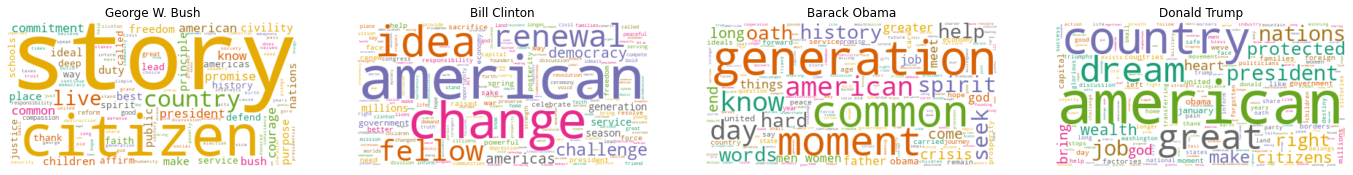

In [33]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [24, 24]

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(1, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Number of Words

In [34]:
# Find the number of unique words that each president uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for president in data.columns:
    uniques = data[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,president,unique_words
3,Donald Trump,441
1,Bill Clinton,489
0,George W. Bush,524
2,Barack Obama,795


In [35]:
# Find the total number of words that a president uses
total_list = []
for president in data.columns:
    totals = sum(data[president])
    total_list.append(totals)

In [36]:
# Create a new dataframe that contains total word count per president
data_word_total = pd.DataFrame(list(zip(full_names, total_list)), columns=['president', 'total_list'])
data_total_words = data_word_total.sort_values(by='total_list')
data_total_words

,president,total_list
3,Donald Trump,646
1,Bill Clinton,706
0,George W. Bush,740
2,Barack Obama,1078


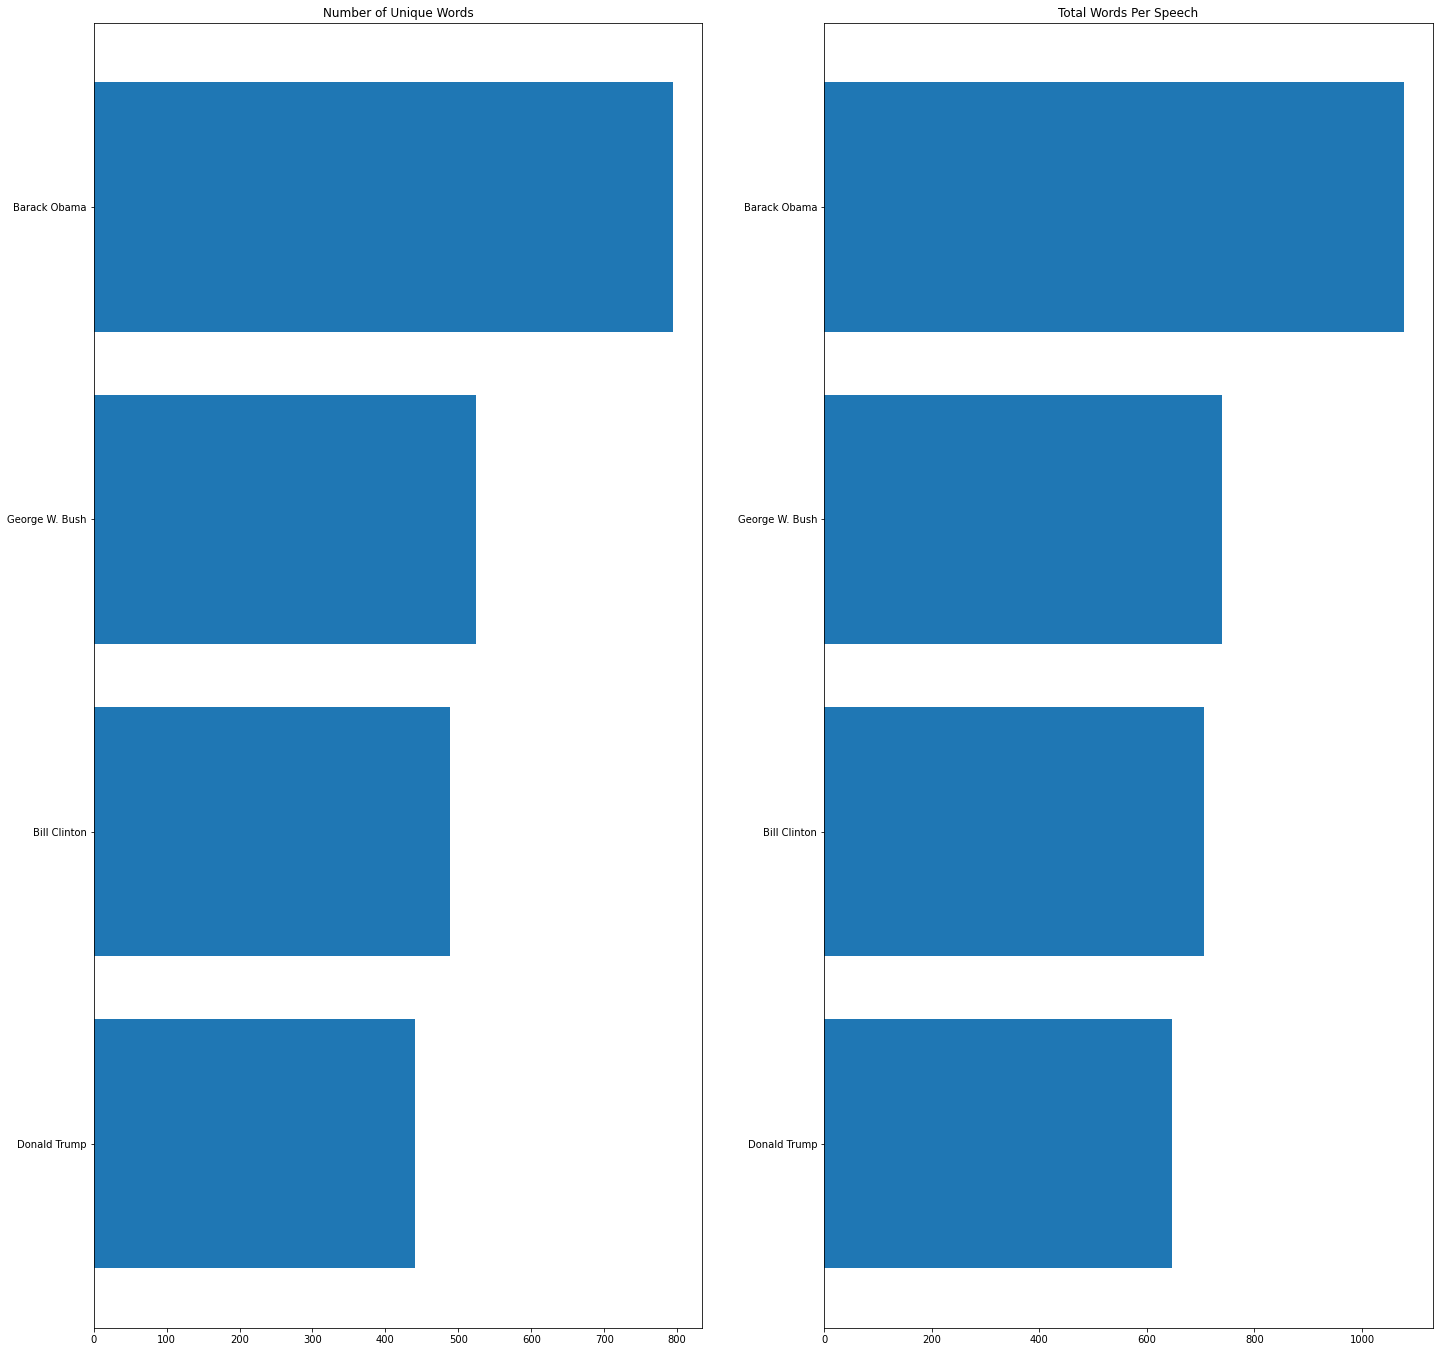

In [37]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.president)
plt.title('Number of Unique Words', fontsize=12)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_total_words.total_list, align='center')
plt.yticks(y_pos, data_total_words.president)
plt.title('Total Words Per Speech', fontsize=12)

#plt.tight_layout()
plt.rcParams['figure.figsize'] = [24, 8]
plt.show()

### Findings

* **Vocabulary**
   * President Barack Obama has the most vocabulary in his speech.
   * Presdient Donald Trump has the least vocabulary in his speech.


* **Word Count**
   * President Barack Obama has more words in his speech.
   * President Donald Trump has less words in his speech.